# Homework - 1 
Dhrumin Desai

In [76]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
from __future__ import division

# Q - 1

In [3]:
bus_df = DataFrame({'X': [8,5,3,9,11,2,1,8,12], 'Y': [859,682,471,708,1094,224,320,651,1049]})
bus_df


,X,Y
0,8,859
1,5,682
2,3,471
3,9,708
4,11,1094
5,2,224
6,1,320
7,8,651
8,12,1049


# a. Scatter plot

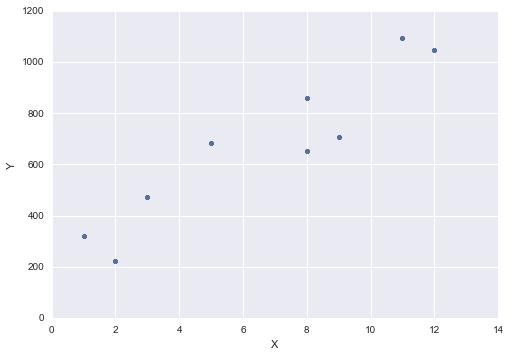

In [4]:
# aScatter plot
bus_df.plot(kind='scatter', x = 'X', y='Y')

In [5]:
slope, intercept, r_value, p_value, std_err = stats.linregress(bus_df.X,bus_df.Y)

In [6]:
predicted_y = slope*bus_df.X+intercept
print predicted_y

0     775.548415
1     562.794014
2     420.957746
3     846.466549
4     988.302817
5     350.039613
6     279.121479
7     775.548415
8    1059.220951
Name: X, dtype: float64


In [7]:
print "slope: ", slope
print "intercept: ", intercept

slope:  70.9181338028
intercept:  208.20334507


# b. Regression line

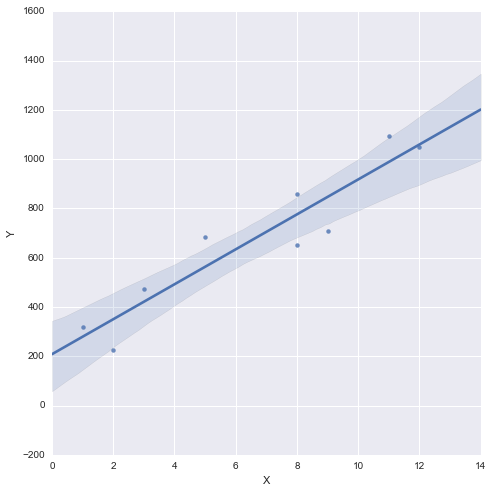

In [8]:

sns.lmplot('X','Y',bus_df,ci=95, size=7)

# c.total sum of squares

In [9]:
# total sum of square of Y
X_mean = bus_df['X'].mean()
print 'mean of X: ',X_mean

X_diff = np.array([(x-X_mean)**2 for x in bus_df.X])

X_TSS = X_diff.sum()
print "Total Sum of squares of X: ", X_TSS

# total sum of square of Y
Y_mean = bus_df['Y'].mean()
print 'mean of Y: ',Y_mean

Y_diff = np.array([(y-Y_mean)**2 for y in bus_df.Y])

Y_TSS = Y_diff.sum()
print "Total Sum of squares of Y: ", Y_TSS

mean of X:  6.55555555556
Total Sum of squares of X:  126.222222222
mean of Y:  673.111111111
Total Sum of squares of Y:  722016.888889


# d. sum of square about regression


In [10]:
y_ypred = np.array([(y - Y_pred)**2 for y,Y_pred in zip(bus_df['Y'],predicted_y)])
sum_about_reg = y_ypred.sum()

print "Sum of Squares about regression: ", sum_about_reg


Sum of Squares about regression:  87197.1540493


# e. sum of square due regression 


In [11]:
y_ymean = np.array([(y - Y_mean)**2 for y in predicted_y])
sum_due_reg = y_ymean.sum()

print "Sum of Squares due to regression: ", sum_due_reg

Sum of Squares due to regression:  634819.73484


# f. Total Sum of Squares = Sum of Squares due to regression + Sum of Squares about regression


In [12]:
print "Total Sum of squares of Y: ", Y_TSS
print "Sum of Squares due to regression + Sum of Squares about regression", sum_about_reg + sum_due_reg

Total Sum of squares of Y:  722016.888889
Sum of Squares due to regression + Sum of Squares about regression 722016.888889


# g)	Find a 95% confidence interval for the slope


SE = sb1 = sqrt [ Σ(yi - ŷi)2 / (n - 2) ] / sqrt [ Σ(xi - x)2 ]


In [13]:
SE = np.sqrt(sum_about_reg/7)
se_y = np.sqrt ((sum_about_reg/7) /X_TSS)

In [14]:
t_val1 =  stats.t.ppf(1-0.025, 7)

In [15]:
print "95% confidence interval of the slope is : ",(slope - t_val1*se_y, slope + t_val1*se_y)

95% confidence interval of the slope is :  (47.427411891347489, 94.408855714286304)


# h. Find a 90% confidence interval for the intercept


Var(b0) = σ2(1/n+ Average(X)2 /SXX)

In [16]:

X2 = (bus_df['X'].mean())**2
t2_val = stats.t.ppf(1-0.05, 7)

se_b0 = SE*np.sqrt((1.0/9 + X2/X_TSS))


In [17]:
print "90% confidence interval of the intercept is : ",(intercept - t2_val*se_b0, intercept + t2_val*se_b0)

90% confidence interval of the intercept is :  (66.106550628599507, 350.30013951224555)


# i.compute R^2

In [18]:
R_sqr = r_value ** 2
print "Value of R_sqr: ", R_sqr

Value of R_sqr:  0.879231143494


# j. Compute correlation between Maintenance Cost and Age


In [19]:
bus_df.corr()

,X,Y
X,1.000000,0.937673
Y,0.937673,1.000000


In [20]:
print "correlation is 0.937673"

correlation is 0.937673


# k. compare R^2 and Correlation

If we take square root of the R^2, it is same as correlation. So essetianly R-value is same as Correlation

In [21]:
np.sqrt(R_sqr)

0.93767326051976718

# l.Forecast the annual maintenance cost for a bus that is 4.5years old and one that is 7 years old.


In [22]:
y4 = intercept +   slope * 4.5
print "The annual maintenance cost of 4.5 years old bus should be around: ", y4

The annual maintenance cost of 4.5 years old bus should be around:  527.334947183


In [23]:
y7 = intercept +   slope * 7
print "The annual maintenance cost of 7 years old bus should be around: ", y7

The annual maintenance cost of 7 years old bus should be around:  704.63028169


# Q - 2

# a) What is the mean and standard deviation of a random roll of this die?


In [90]:
die1 = np.array([1,2,3,4,5,6])
probability1 = np.array([1/6.0]*6)
print "die: ", die1
print "probability: ",probability1

die:  [1 2 3 4 5 6]
probability:  [ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667]


In [91]:
xPx = die1 * probability1

xPx

array([ 0.16666667,  0.33333333,  0.5       ,  0.66666667,  0.83333333,  1.        ])

In [92]:
# now we know that mean = SUM OF XPX
mean = xPx.sum()
print "Mean: ", mean

Mean:  3.5


In [93]:
std = die1.std()
print "standard deviation of random roll dice: ", std

standard deviation of random roll dice:  1.70782512766


# b.	Use random number generator to simulate 100 rolls of this die and calculate the following number:


In [88]:
from numpy.random import randint
nums = []
for i in range(1000):
    rand_100 = np.array ([randint(1,7) for x in range(100)])
    n = 100
    num = (rand_100.sum() - n * mean) / (np.sqrt(n) * std)
    nums.append(num)

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([   3.,   14.,   49.,  135.,  224.,  255.,  217.,   74.,   23.,    6.]),
 array([-3.45468626, -2.79302601, -2.13136576, -1.46970551, -0.80804526,
        -0.14638501,  0.51527524,  1.17693549,  1.83859574,  2.50025599,
         3.16191624]),
 <a list of 10 Patch objects>)

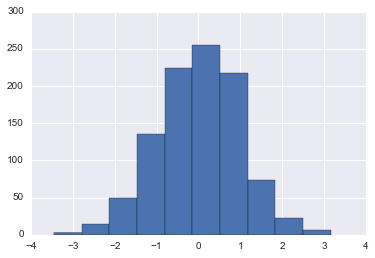

In [89]:
plt.hist(nums)

# C. Change the numbers on the face of die to 1, √2, 3, 16, 5, √6 and the probability of these numbers occurring to 5%, 10%, 20%, 30%, 25% , and 10% respectively.  Repeat part a and b


In [96]:
die2 = np.array([1,np.sqrt(2),3,16,5,np.sqrt(6)])
probability2 = np.array([0.05,0.1,0.2,0.3,0.25,0.1])
print "die: ", die2
print "probability: ",probability2

die:  [  1.           1.41421356   3.          16.           5.           2.44948974]
probability:  [ 0.05  0.1   0.2   0.3   0.25  0.1 ]


In [97]:
xPx2 = die2 * probability2
xPx2

array([ 0.05      ,  0.14142136,  0.6       ,  4.8       ,  1.25      ,
        0.24494897])

In [99]:
mean2 = xPx2.mean()
print "Mean of the changed values: ", mean2

Mean of the changed values:  1.18106172175


In [105]:
# now standard deviation = square root of sum(x^2*p(x)) - mean^2
x2Px = (die2 ** 2) * probability2
std2 = np.sqrt(x2Px.sum()) - mean2**2
print "Standard deviation of the changed values: ", std2

Standard deviation of the changed values:  7.86252265824


In [112]:
import random
nums2 = []
for i in range(1000):
    rand_100 = np.array ([random.choice(die2) for x in range(100)])
    n = 100
    num = (rand_100.sum() - n * mean2) / (np.sqrt(n) * std2)
    nums2.append(num)

(array([   6.,   20.,   91.,  173.,  266.,  225.,  141.,   52.,   23.,    3.]),
 array([ 2.51565927,  2.94811566,  3.38057206,  3.81302846,  4.24548485,
         4.67794125,  5.11039764,  5.54285404,  5.97531044,  6.40776683,
         6.84022323]),
 <a list of 10 Patch objects>)

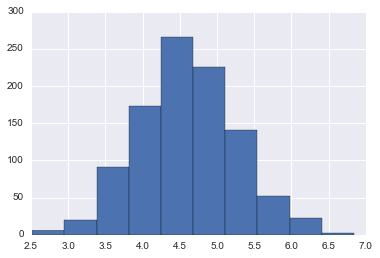

In [113]:
plt.hist(nums2)